<a href="https://colab.research.google.com/github/kmanoj94/Perceptron-model/blob/main/DL_102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load dataset

In [ ]:
import sklearn.datasets
import numpy as np 

In [ ]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [ ]:
x=breast_cancer.data
y=breast_cancer.target

In [ ]:
x.shape

(569, 30)

In [ ]:
y.shape

(569,)

In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [ ]:
data.head

<bound method NDFrame.head of      mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]>

In [ ]:
data['class']=breast_cancer.target

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [ ]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [ ]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# test train split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x= data.drop('class', axis=1)
y=data['class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(569, 30) (426, 30) (143, 30)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

In [ ]:
print(x.shape, x_train.shape, x_test.shape, y.shape, y_train.shape, y_test.shape)

(569, 30) (512, 30) (57, 30) (569,) (512,) (57,)


In [ ]:
print(y_train.mean(), y_test.mean(),y.mean())

0.626953125 0.631578947368421 0.6274165202108963


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, stratify=y)

In [ ]:
print(x_train.mean(), x_test.mean(),x.mean())

mean radius                 14.159297
mean texture                19.337754
mean perimeter              92.223242
mean area                  659.324414
mean smoothness              0.096390
mean compactness             0.105718
mean concavity               0.090501
mean concave points          0.049290
mean symmetry                0.181923
mean fractal dimension       0.062952
radius error                 0.406624
texture error                1.217379
perimeter error              2.885091
area error                  40.844100
smoothness error             0.007098
compactness error            0.026111
concavity error              0.032682
concave points error         0.011869
symmetry error               0.020725
fractal dimension error      0.003868
worst radius                16.328018
worst texture               25.728848
worst perimeter            107.698691
worst area                 889.840039
worst smoothness             0.132648
worst compactness            0.259197
worst concav

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, stratify=y,random_state=1)

In [ ]:
print(x_train.mean(), x_test.mean(),x.mean())

mean radius                 14.058656
mean texture                19.309668
mean perimeter              91.530488
mean area                  648.097266
mean smoothness              0.096568
mean compactness             0.105144
mean concavity               0.089342
mean concave points          0.048892
mean symmetry                0.181961
mean fractal dimension       0.062979
radius error                 0.403659
texture error                1.206856
perimeter error              2.861173
area error                  39.935506
smoothness error             0.007067
compactness error            0.025681
concavity error              0.032328
concave points error         0.011963
symmetry error               0.020584
fractal dimension error      0.003815
worst radius                16.194275
worst texture               25.644902
worst perimeter            106.757715
worst area                 871.647852
worst smoothness             0.132592
worst compactness            0.257415
worst concav

# Binarisation of input

In [ ]:
import matplotlib.pyplot as plt


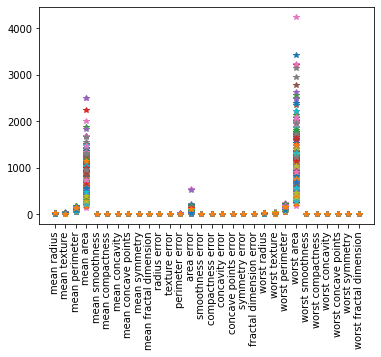

In [ ]:
plt.plot(x_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
x_binarised_3_train = x_train['mean area'].map(lambda x: 0 if x<1000 else 1)

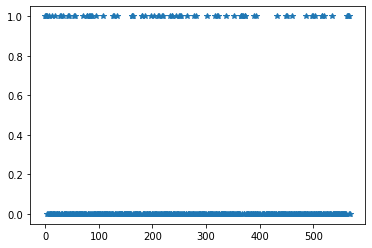

In [ ]:
plt.plot(x_binarised_3_train, '*')

In [ ]:
x_binarised_train= x_train.apply(pd.cut, bins=2, labels=[1, 0])

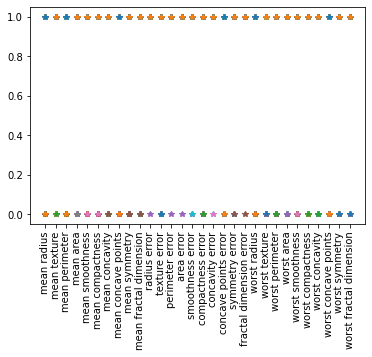

In [ ]:
plt.plot(x_binarised_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
x_binarised_test= x_test.apply(pd.cut, bins=2, labels=[1,0])

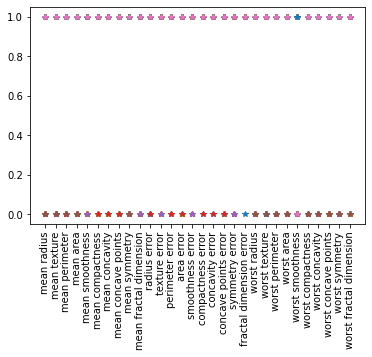

In [ ]:
plt.plot(x_binarised_test.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
x_binarised_train=x_binarised_train.values
x_binarised_test=x_binarised_test.values

In [ ]:
type(x_binarised_test)

numpy.ndarray

# MP Neuron model

In [ ]:
from random import randint

In [ ]:
b = 3

i=randint(0, x_binarised_train.shape[0])
print('for row', i)

if(np.sum(x_binarised_train[i]) >= b):
  print("MP neuron inference is malignant")
else:
  print("MP neuron inference is benign")

if(y_train[i]==1):
  print("ground truth is malign")
else:
  print("ground truth is benign")


for row 503
MP neuron inference is malignant
ground truth is benign


In [ ]:
b=3
y_pred_train=[]
accurate_row=0

for x,y in zip(x_binarised_train,y_train):
  y_pred = (np.sum(x)>=b)
  y_pred_train.append(y_pred)
  accurate_row+=(y==y_pred)

print(accurate_row, accurate_row/x_binarised_train.shape[0])

321 0.626953125


In [ ]:
for b in range (x_binarised_train.shape[1]+ 1):
  y_pred_train=[]
  accurate_row=0

  for x,y in zip(x_binarised_train,y_train):
    y_pred = (np.sum(x)>=b)
    y_pred_train.append(y_pred)
    accurate_row+=(y==y_pred)

  print(b, accurate_row/x_binarised_train.shape[0])


0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125
30 0.759765625


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
b= 28
y_pred_test=[]
accurate_row=0

for x in x_binarised_test:
  y_pred = (np.sum(x)>=b)
  y_pred_test.append(y_pred)
accuracy = accuracy_score(y_pred_test, y_test)
print(b, accuracy)

28 0.7894736842105263


# MP Neuron class

In [ ]:
class MPNeuron:

  def __init__(self):
    self.b=None
  
  def model(self, x):
    return(sum(x)>=self.b)
  
  def predict(self, X):
    Y=[]
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self, X, Y):
    accuracy = {}

    for b in range(X.shape[1] + 1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)

    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b

    print("optimal value od b is :", best_b)
    print("highest accuray is :", accuracy[best_b])



In [ ]:
mp_neuron = MPNeuron()
mp_neuron.fit(x_binarised_train, y_train)

optimal value od b is : 28
highest accuray is : 0.849609375


In [ ]:
y_test_pred = mp_neuron.predict(x_binarised_test)
accuracy_test = accuracy_score(y_test_pred, y_test)

In [ ]:
print(accuracy_test)

0.7894736842105263


# Perceptron class

In [ ]:
x_train = x_train.values
x_test = x_test.values

$y=1,\mbox{if} \sum_i w_ix_i>=b$

$y=0, \mbox{otherwise}$

In [ ]:
class Perceptron:

  def __init__(self):
    self.w = None
    self.b = None

  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0

  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self, X, Y, epochs = 1, lr = 1):
    self.w = np.ones(X.shape[1])
    self. b= 0
    accuracy = {}
    max_accuracy = 0
    wt_matrix = []

    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)

        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b + lr * 1

        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b - lr * 1

      wt_matrix.append(self.w)
      accuracy[i] = accuracy_score(self.predict(X),Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b

    self.w = chkptw
    self.b = chkptb
    print(max_accuracy)

    plt.plot(np.array(list(accuracy.values())).astype(float))
    plt.ylim([0, 1])
    plt.show()

    return np.array(wt_matrix)

      

  

In [ ]:
perceptron = Perceptron()

0.927734375


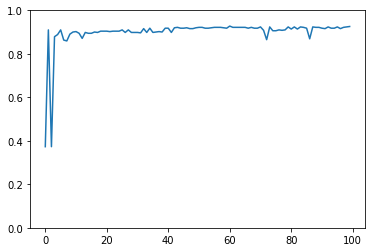

In [ ]:
wt_matrix = perceptron.fit(x_train, y_train,100)

In [ ]:
y_pred_train = perceptron.predict(x_train)
print(accuracy_score(y_pred_train, y_train))

0.927734375


In [ ]:
y_pred_test = perceptron.predict(x_test)
print(accuracy_score(y_pred_test, y_test))

0.9473684210526315


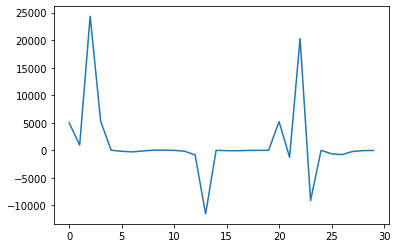

In [ ]:
plt.plot(wt_matrix[-1, :])
plt.show()

In [ ]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

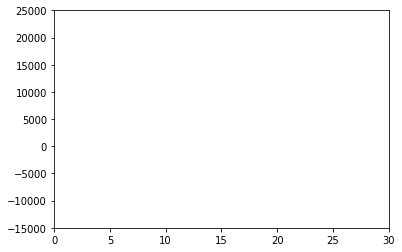

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((0, wt_matrix.shape[1]))
ax.set_ylim((-15000, 25000))

line, = ax.plot([], [], lw=2)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i, :]
    line.set_data(x, y)
    return (line,)

In [ ]:
def init():
    line.set_data([], [])
    return (line,)

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,frames=100, interval=200, blit=True)


In [ ]:
HTML(anim.to_html5_video())